In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [89]:
pd.options.mode.chained_assignment = None

## Data preprocessing and EDA

In [90]:
outfit = pd.read_csv("datathon/dataset/outfit_data.csv")
product = pd.read_csv("datathon/dataset/product_data.csv")

In [91]:
outfit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43582 entries, 0 to 43581
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cod_outfit        43582 non-null  int64 
 1   cod_modelo_color  43582 non-null  object
dtypes: int64(1), object(1)
memory usage: 681.1+ KB


In [92]:
outfit.head()

,cod_outfit,cod_modelo_color
0,1,51000622-02
1,1,43067759-01
2,1,53060518-02
3,1,53030594-08
4,1,43077762-01


In [93]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9222 entries, 0 to 9221
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   cod_modelo_color               9222 non-null   object
 1   cod_color_code                 9222 non-null   object
 2   des_color_specification_esp    9222 non-null   object
 3   des_agrup_color_eng            9222 non-null   object
 4   des_sex                        9222 non-null   object
 5   des_age                        9222 non-null   object
 6   des_line                       9222 non-null   object
 7   des_fabric                     9222 non-null   object
 8   des_product_category           9222 non-null   object
 9   des_product_aggregated_family  9222 non-null   object
 10  des_product_family             9222 non-null   object
 11  des_product_type               9222 non-null   object
 12  des_filename                   9222 non-null   object
dtypes: 

In [94]:
product.head()

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename
0,41085800-02,02,OFFWHITE,WHITE,Female,Adult,SHE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg
1,53000586-TO,TO,TEJANO OSCURO,BLUE,Female,Adult,SHE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,datathon/images/2019_53000586_TO.jpg
2,53030601-81,81,ROSA PASTEL,PINK,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53030601_81.jpg
3,53050730-15,15,MOSTAZA,YELLOW,Female,Adult,SHE,P-PLANA,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2019_53050730_15.jpg
4,53070773-70,70,ROJO,RED,Female,Adult,SHE,P-PLANA,Tops,Shirts,Shirt,Shirt,datathon/images/2019_53070773_70.jpg


In [95]:
# Check number of different outfits and distribution
outfit["cod_outfit"].value_counts()

cod_outfit
2003    15
497     13
1798    13
431     13
1577    13
        ..
4034     2
2711     2
2727     2
7090     2
7373     2
Name: count, Length: 7842, dtype: int64

Having around 8k different with 10k pieces of clothing (they can be part of different outfits) unables to use outfit as a target variable in a supervised learning model.

In [96]:
# We merge the df into a single dataframe
df_merged = pd.merge(product, outfit, how = "inner", on = "cod_modelo_color")

In [97]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43582 entries, 0 to 43581
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   cod_modelo_color               43582 non-null  object
 1   cod_color_code                 43582 non-null  object
 2   des_color_specification_esp    43582 non-null  object
 3   des_agrup_color_eng            43582 non-null  object
 4   des_sex                        43582 non-null  object
 5   des_age                        43582 non-null  object
 6   des_line                       43582 non-null  object
 7   des_fabric                     43582 non-null  object
 8   des_product_category           43582 non-null  object
 9   des_product_aggregated_family  43582 non-null  object
 10  des_product_family             43582 non-null  object
 11  des_product_type               43582 non-null  object
 12  des_filename                   43582 non-null  object
 13  c

In [98]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43582 entries, 0 to 43581
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   cod_modelo_color               43582 non-null  object
 1   cod_color_code                 43582 non-null  object
 2   des_color_specification_esp    43582 non-null  object
 3   des_agrup_color_eng            43582 non-null  object
 4   des_sex                        43582 non-null  object
 5   des_age                        43582 non-null  object
 6   des_line                       43582 non-null  object
 7   des_fabric                     43582 non-null  object
 8   des_product_category           43582 non-null  object
 9   des_product_aggregated_family  43582 non-null  object
 10  des_product_family             43582 non-null  object
 11  des_product_type               43582 non-null  object
 12  des_filename                   43582 non-null  object
 13  c

In [99]:
df_merged["des_age"].value_counts()

des_age
Adult    43561
Kids        21
Name: count, dtype: int64

In [100]:
df_merged["des_sex"].value_counts()

des_sex
Female    43438
Unisex      141
Male          3
Name: count, dtype: int64

In [101]:
df_merged["des_line"].value_counts()

des_line
SHE        43395
HOME         141
VIOLETA       22
KIDS          21
HE             3
Name: count, dtype: int64

In [102]:
df_merged

,cod_modelo_color,cod_color_code,des_color_specification_esp,des_agrup_color_eng,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename,cod_outfit
0,41085800-02,02,OFFWHITE,WHITE,Female,Adult,SHE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg,1769
1,41085800-02,02,OFFWHITE,WHITE,Female,Adult,SHE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg,1396
2,41085800-02,02,OFFWHITE,WHITE,Female,Adult,SHE,P-PLANA,Bottoms,Trousers & leggings,Trousers,Trousers,datathon/images/2019_41085800_02.jpg,683
3,53000586-TO,TO,TEJANO OSCURO,BLUE,Female,Adult,SHE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,datathon/images/2019_53000586_TO.jpg,629
4,53000586-TO,TO,TEJANO OSCURO,BLUE,Female,Adult,SHE,J-JEANS,Bottoms,Jeans,Jeans,Jeans,datathon/images/2019_53000586_TO.jpg,616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43577,57068275-05,05,CRUDO,WHITE,Female,Adult,SHE,C-COMPLEMENTOS,"Accesories, Swim and Intimate",Swim and intimate,Intimate,Socks,datathon/images/2023_57068275_05.jpg,6561
43578,57067125-78,78,BURDEOS,RED,Female,Adult,SHE,K-CIRCULAR,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2023_57067125_78.jpg,6484
43579,57067125-78,78,BURDEOS,RED,Female,Adult,SHE,K-CIRCULAR,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,datathon/images/2023_57067125_78.jpg,7343
43580,57039120-PL,PL,PLATA,GREY,Female,Adult,SHE,T-TRICOT,Tops,Tops,Tops,Top,datathon/images/2023_57039120_PL.jpg,4852


Over 99,5% of pieces of clothing in our dataset correspond to adult females and are from the line SHE. Therefore we will focus on this pieces of clothing and we will remove the others.

In [103]:
df_merged = df_merged[(df_merged["des_sex"] == "Female") &  (df_merged["des_age"] == "Adult") & (df_merged["des_line"] == "SHE")]
df_merged.drop(columns = ["des_sex", "des_age", "des_line"], inplace = True)

In [104]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43395 entries, 0 to 43581
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   cod_modelo_color               43395 non-null  object
 1   cod_color_code                 43395 non-null  object
 2   des_color_specification_esp    43395 non-null  object
 3   des_agrup_color_eng            43395 non-null  object
 4   des_fabric                     43395 non-null  object
 5   des_product_category           43395 non-null  object
 6   des_product_aggregated_family  43395 non-null  object
 7   des_product_family             43395 non-null  object
 8   des_product_type               43395 non-null  object
 9   des_filename                   43395 non-null  object
 10  cod_outfit                     43395 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


Let's see what an outfit looks like

In [105]:
df_1 = df_merged[df_merged["cod_outfit"] == 1]

In [106]:
def show_outfit(df, code_outfit):
    df_outfit = df[df["cod_outfit"] == code_outfit]
    for index, row in df_outfit.iterrows():
        image_path = row['des_filename']
        display(Image(filename=image_path))

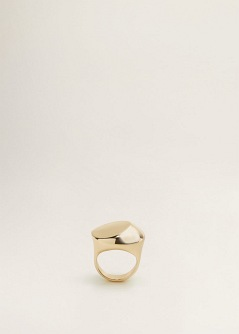

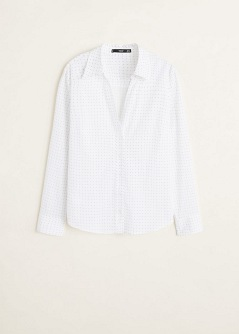

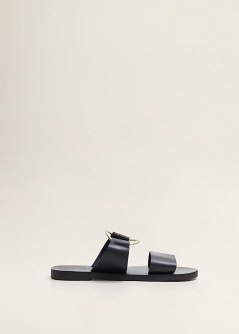

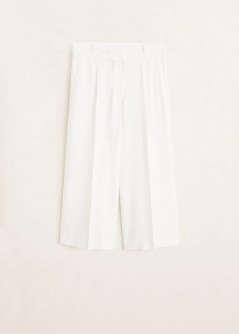

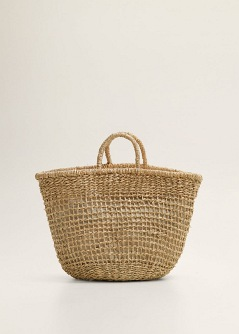

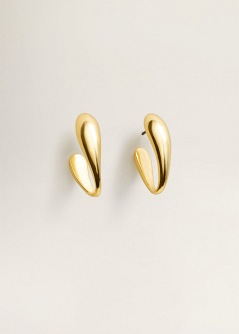

In [107]:
show_outfit(df_merged, 30);

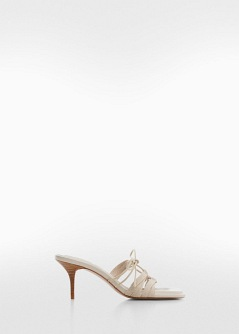

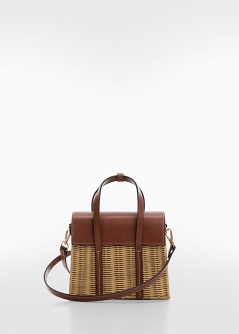

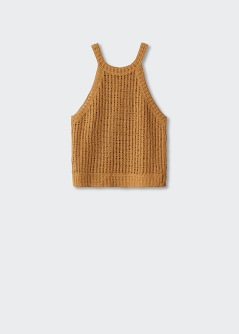

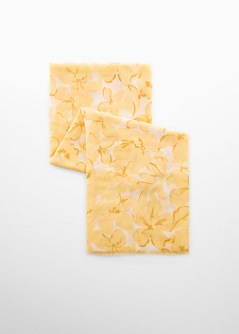

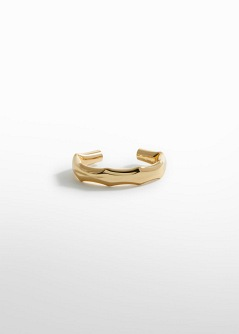

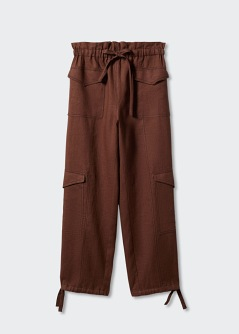

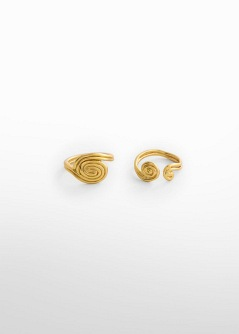

In [108]:
show_outfit(df_merged, 4003);

By showing some outfits we can affirm that color plays an important role when it comes to pieces selection for the creation of an outfit. The importance of color and material are explored deeply in the R notebook in the same repository.

In [109]:
cod_outfit = df_merged["cod_outfit"].values

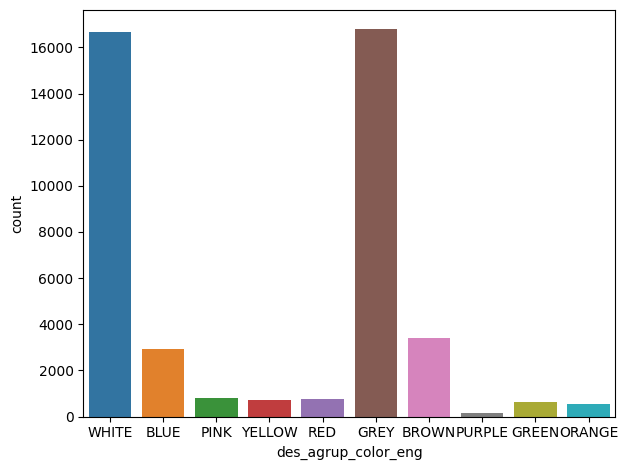

In [110]:
sns.countplot(df_merged, x = "des_agrup_color_eng")
plt.tight_layout();

In [111]:
color_esp_freq = df_merged["des_color_specification_esp"].value_counts()
color_esp_freq = color_esp_freq[color_esp_freq > 200]

In [112]:
color_esp_freq

des_color_specification_esp
NEGRO                12371
ORO                   7682
BLANCO                2333
PLATA                 2277
CRUDO                 2083
OFFWHITE              1773
BEIGE                 1313
MARRON                 940
CUERO                  934
GRIS                   765
CAMEL                  580
TEJANO MEDIO           556
ARENA                  534
AZUL                   533
CHOCOLATE              451
VERDE                  448
TEJANO NEGRO           439
KHAKI                  419
TEJANO OSCURO          400
ROJO                   392
NAVY                   317
GRIS MEDIO VIGORE      277
PIEDRA                 261
TEJANO CLARO           260
CELESTE                255
NARANJA                232
TERRACOTA              212
Name: count, dtype: int64

We can observe there are some colors that are more frequent than others when it comes to fashion and frequency in pieces of clothing.

We extract how the pieces of clothing type is distributed. 

In [113]:
df_merged["des_product_aggregated_family"].unique()

array(['Trousers & leggings', 'Jeans', 'Dresses and jumpsuits', 'Shirts',
       'Sweaters and Cardigans', 'Skirts and shorts', 'Accessories',
       'Tops', 'Jackets and Blazers', 'Coats and Parkas', 'T-shirts',
       'Swim and intimate', 'Fragance'], dtype=object)

In [114]:
df_merged["des_product_family"].unique()

array(['Trousers', 'Jeans', 'Dresses', 'Shirt', 'Sweater', 'Skirts',
       'Jewellery', 'Bags', 'Glasses', 'Wallets & cases', 'Shorts',
       'Tops', 'Belts and Ties', 'Jumpsuit', 'Jackets', 'Coats',
       'Footwear', 'Hats, scarves and gloves', 'T-shirt', 'Blazers',
       'Gadgets', 'Swimwear', 'Vest', 'Fragances', 'Cardigans',
       'Trenchcoats', 'Puffer coats', 'Outer Vest',
       'Leggings and joggers', 'Poloshirts', 'Intimate', 'Sweatshirts',
       'Bodysuits', 'Leather jackets', 'Parkas'], dtype=object)

In [115]:
df_merged["des_product_type"].unique()

array(['Trousers', 'Jeans', 'Dress', 'Shirt', 'Sweater', 'Skirt',
       'Earrings', 'Totes bag', 'Sunglasses', 'Card holder', 'Wallet',
       'Shorts', 'Top', 'Belt', 'Crossbody bag', 'Jumpsuit', 'Jacket',
       'Coat', 'Sandals', 'Kerchief', 'Shoes', 'Blouse', 'T-Shirt',
       'Blazer', 'Umbrella', 'Citybag', 'Bikini top', 'Vest',
       'Shoulder bag', 'Bodymist', 'Beanie', 'Handbag', 'Cardigan',
       'Glasses', 'Trenchcoat', 'Puffer coat', 'Necklace',
       'Bikini pantie', 'Outer vest', 'Scarf', 'Ankle Boots', 'Leggings',
       'Cosmetic bag', 'Ring', 'Poloshirt', 'Pyjama', 'Sweatshirt',
       'Boots', 'Hat', 'Beach Towel', 'Gloves', 'Bodysuit', 'Fragance',
       'Leather Jacket', 'Hairband', 'Bermudas', 'Cap', 'Parka',
       'Pyjama Trousers', 'Pyjama Shirt', 'Bras', 'Trainers', 'Foulard',
       'Hairclip', 'Case', 'Bracelet', 'Pyjama Shorts', 'Sweater Vest',
       'Pyjiama Sweater', 'Bucket bag', 'Jacket (Cazadora)', 'Purse',
       'Belt bag', 'Sock (Pack)', 'Socks'

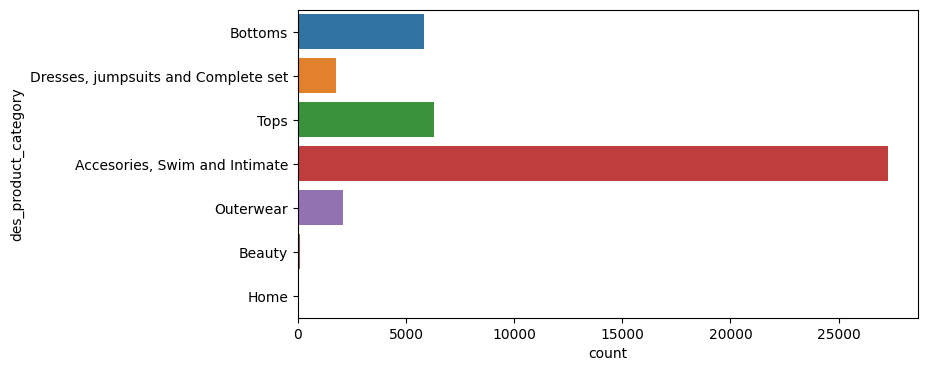

In [116]:
fig, axes = plt.subplots(figsize=(8, 4))
sns.countplot(df_merged, y = "des_product_category");

The majority of pieces of clothing belong to the categories Accesories, Swim and Intimiate, as well as to Tops and Bottoms. For the outfit generation Beauty and Home will not be included due to their almost nonexistent apparitions in outfits.

In [117]:
product_type_freq = df_merged["des_product_type"].value_counts()
product_type_freq = pd.DataFrame(product_type_freq[product_type_freq > 30])

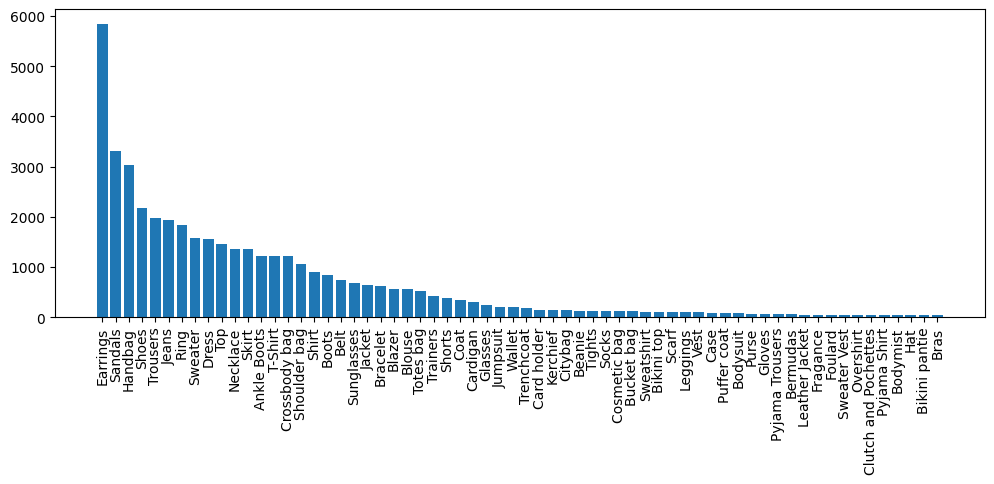

In [118]:
fig, axes = plt.subplots(figsize=(12, 4))
plt.bar(product_type_freq.index, product_type_freq["count"])
plt.xticks(rotation = 90);